# Patient Charges \|\| EDA and Clustering

Silia Georgaki

## Introduction

Every dataset has a story to tell. It is fascinating how behind every
row and column of data, real-world phenomena, events, and interactions
hide. Data mining is the process of discovering patterns, relationships,
and insights from large datasets. It involves applying various
techniques and algorithms to extract valuable information and knowledge
that can be used for decision-making, prediction, and optimization. By
mining the data, we aim to uncover hidden patterns, trends, and
correlations that can help us understand the underlying story. In this
project, we explore how different factors affect the charges of patients
and how some factors might correlate with each other, by formulating
hypotheses and performing Explorative Data Analysis and Clustering.

## Data Information

The dataset used for this project helds information about 1338 patients.
Hence, it consists of 1338 rows and 7 columns. Those are:

-   Age: age of primary beneficiary.
-   Sex (insurance contractor gender): female, male.
-   BMI (Body mass index): providing an understanding of body, weights
    that are relatively high or low relative to height, objective index
    of body weight (kg / m ^ 2) using the ratio of height to weight,
    ideally 18.5 to 24.9
-   Children: Number of children covered by health insurance / Number of
    dependents
-   Smoker: Smoking or not
-   Region: the beneficiary’s residential area in the US. Those are
    North-East, South-East, South-West, North-West.
-   Charges: Individual medical costs billed by health insurance.

## Import libraries and load data

First step is loading the necessary packages.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

## Load file

Before any hypotheses being made, it is good to know the data we are
working with. Reasonably, the first step is loading the data and viewing
the first rows.

In [2]:
# Read the CSV file
data = pd.read_csv("insurance.csv")
# View the first 5 rows
data.head()

## EDA

Performing Explorative Data Analysis, will aim us gain a deeper
understanding of our dataset.

### Check shape, data types, missing values and desciptive statistics

After visualizing the dataset, it is important to examine the data’s
structure and ensure that there are no missing values. Missing data
occurs when no value is recorded for a particular variable in an
observation. This step is crucial because missing values can
significantly impact the conclusions drawn from the analysis. Yet,
another crucial step is descriptive statistics. Generally, computing and
examining descriptive statistics provides a comprehensive overview of
the data, helps identify data quality issues, and facilitates data
understanding and preprocessing.

In [3]:
# Print the shape
print("Data shape:\n", data.shape)
# Checking the data types
print("\nData types:\n", data.dtypes)
# Checking for missing values
print("\nMissing values:\n", data.isnull().sum())
# Descriptive statistics
print("\nDescriptive statistics\n", data.describe())

Data shape:
 (1338, 7)

Data types:
 age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Missing values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Descriptive statistics
                age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

### Distributions

In the step above we verified that there are no missing values. Hence,
we can check the distribution of the data in each column. This step can
provide valuable insights into the underlying patterns and
characteristics of the data, allowing for a deeper understanding and the
formulation of hypotheses.

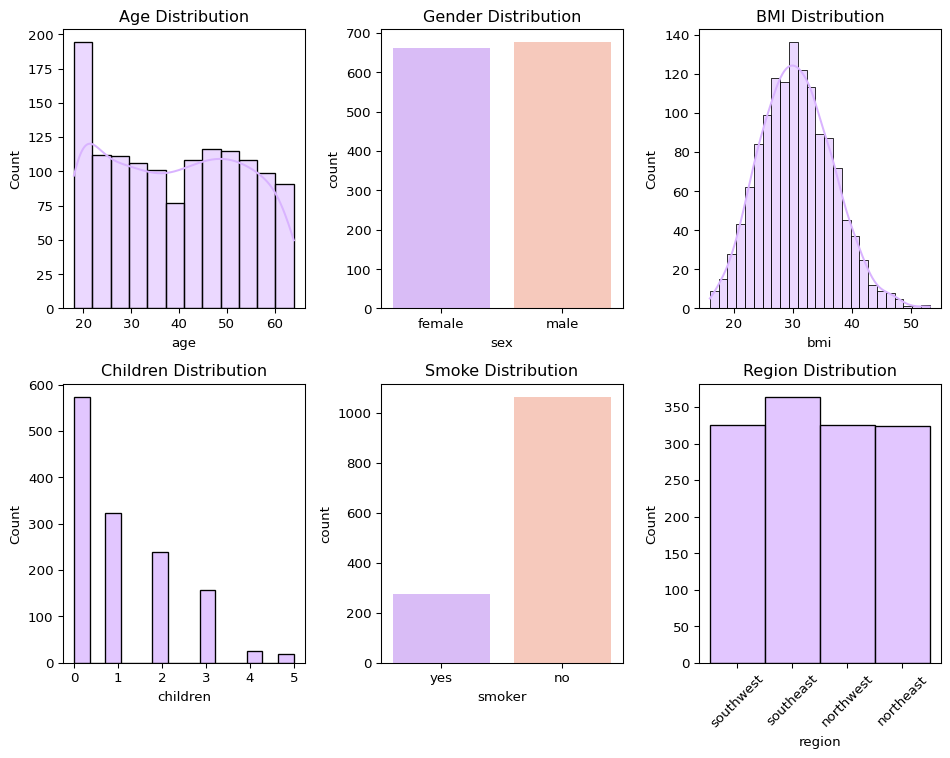

In [4]:
# Create subplots
fig, axs = plt.subplots(2, 3, figsize = (10, 8))

# Distribution of Age
sns.histplot(x = 'age', data = data, kde = True, color = "#D9B3FF", ax = axs[0, 0])
axs[0, 0].set_title("Age Distribution")

# Distribution of Gender
sns.countplot(x = 'sex', data = data, palette = ["#D9B3FF", "#FFC4B3"], ax = axs[0, 1])
axs[0, 1].set_title("Gender Distribution")

# Distribution of BMI
sns.histplot(x = 'bmi', data = data, kde = True, color = "#D9B3FF", ax = axs[0, 2])
axs[0, 2].set_title("BMI Distribution")

# Distribution of Children
sns.histplot(x = 'children', data = data, kde = False, color = "#D9B3FF", ax = axs[1, 0])
axs[1, 0].set_title("Children Distribution")

# Distribution of Smokers
sns.countplot(x = 'smoker', data = data, palette = ["#D9B3FF", "#FFC4B3"], ax = axs[1, 1])
axs[1, 1].set_title("Smoke Distribution")

# Distribution of Region
sns.histplot(x = 'region', data = data, kde = False, color = "#D9B3FF", ax = axs[1, 2])
plt.xticks(rotation = 45) 
axs[1, 2].set_title("Region Distribution")

# Adjust spacing between subplots
plt.tight_layout()
# Show the plots
plt.show()

Our analysis is mostly focused on analyzing the impact of the factors
visualized earlier on the patiet charges. It is thus important to
visualize the charges. This will give us a clearer understanding of the
distribution, range, and average values associated with the patient
charges given and probably help us formulate additional hypotheses.

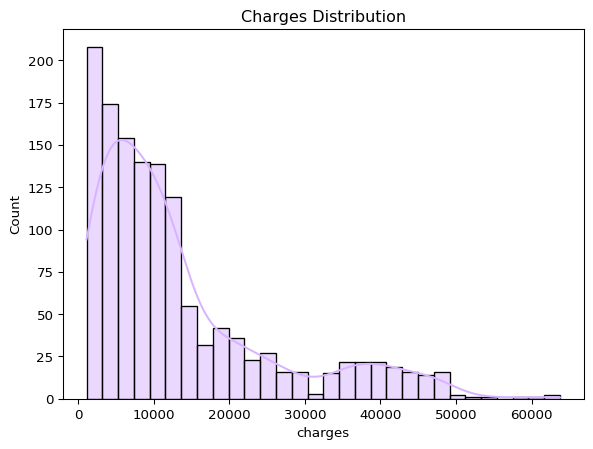

In [5]:
# Distribution of charges 
sns.histplot(x = 'charges', data = data, kde = True, color = "#D9B3FF")
plt.title("Charges Distribution")
plt.show()

### Correlation Matrixes

Another step before we start generating hypotheses is creating a
correlation matrix. This step will help us clarify the relationships
between variables in our dataset.

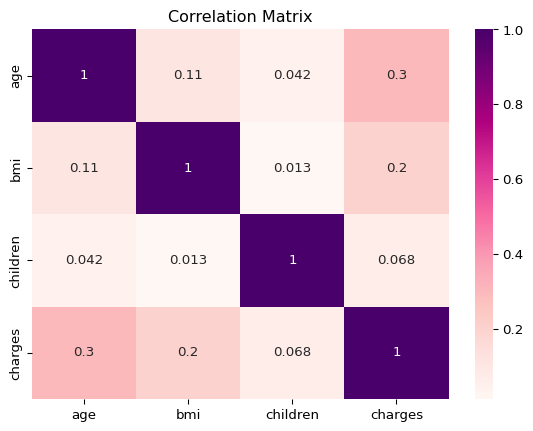

In [6]:
# Select only numerical columns 
# Columns sex, region and smokers will not be selected
numerical_data = data.select_dtypes(include = [float, int])
# Calculate the correlation matrix for numerical data
corr_matrix = numerical_data.corr()

# Plot the correlation matrix
sns.heatmap(corr_matrix, annot = True, cmap = 'RdPu')
plt.title("Correlation Matrix")
plt.show()

From the Correlation Matrix above we get the following information:

-   Charges are mostly affected by age, then BMI and then children.
-   BMI and age are somewhat related.
-   BMI and children are not that related.

However, it is noticeable that the correlation matrix does not fully
capture the influence of all factors, such as gender, smoker status, and
region. To address this limitation, we can employ one-hot encoding,
which involves creating binary columns for each category in the original
categorical columns. This transformation allows us to include these
categorical variables in the correlation matrix while preserving their
labels.

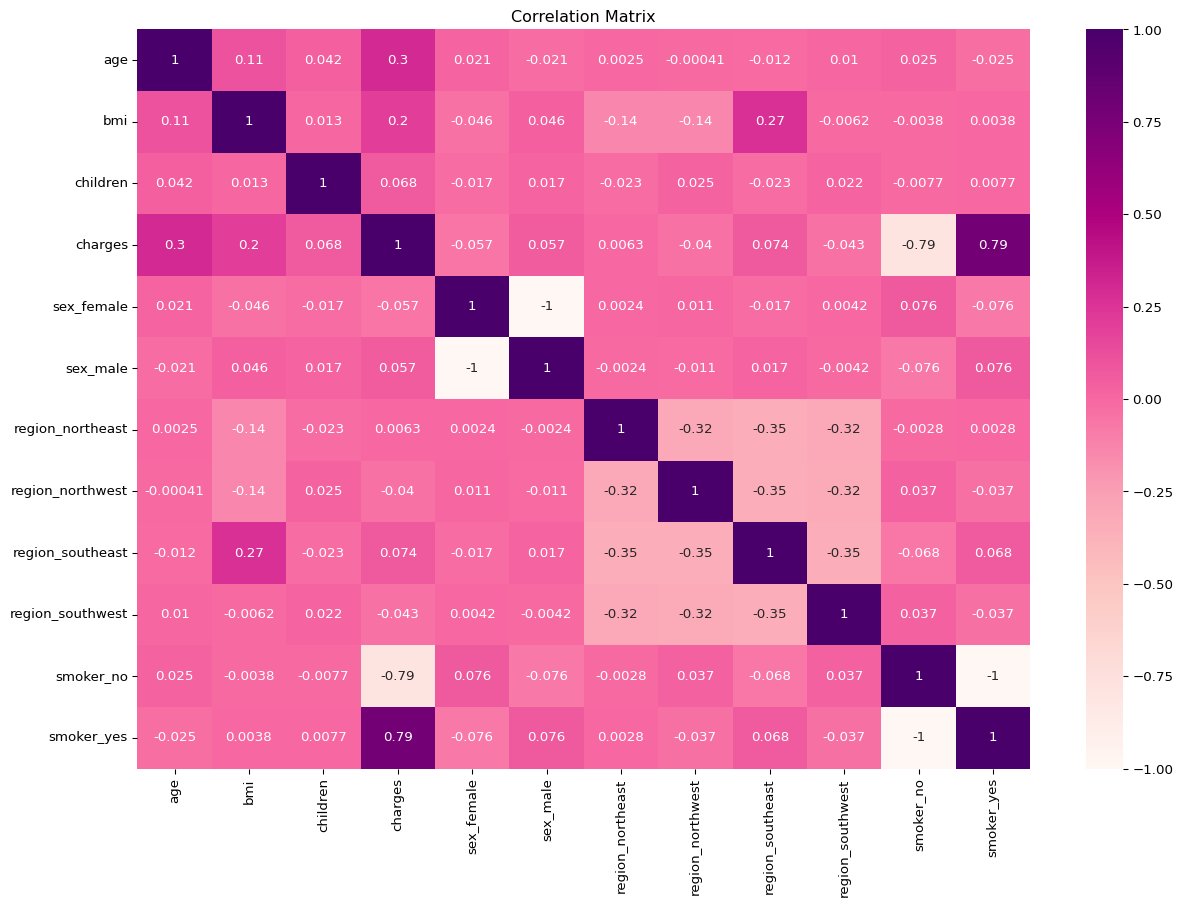

In [7]:
# Select the categorical columns to be encoded
categorical_cols = ['sex', 'region', 'smoker']
# Perform one-hot encoding on the categorical columns
encoded_data = pd.get_dummies(data, columns = categorical_cols)
# Calculate the correlation matrix for all columns
corr_matrix = encoded_data.corr()

# Plot the correlation matrix
plt.figure(figsize = (15,10))
sns.heatmap(corr_matrix, annot = True, cmap = 'RdPu')
plt.title("Correlation Matrix")
plt.show()

With this step we get more precise resuts. The final information is:

-   Charges are mostly affected by smoking, then age, then BMI. On
    average, the region is not a significant factor, except for the
    South-East region, which has a notable impact on charges. Children
    and gender also seem to affect the charges but not that
    significally.
-   South-East Region and BMI are highly related.
-   BMI is related to male gender.
-   South-East Region and male gender are related.

### Making hypotheses

The steps above help us generate plenty hypotheses. Considering the
earlier information we assume that:

1.  Smokers have more expenses.
2.  There are more smokers in the South-East region. Hence, there are
    higher charges on that region.
3.  Smokers are mostly men, hence, there are more males on South-East
    region.
4.  Older people have more expenses.
5.  There is higher BMI in the South-East region. Hence, there are
    higher charges on that region and males have higher BMI.
6.  With the hypothesis that most smokers are males and males have
    higher BMI, males have higher charges than females.
7.  Parents have higher charges than no parents.

### Smokers and Charges

In this plot it is shown that people who smoke have higher expenses than
people who do not smoke.

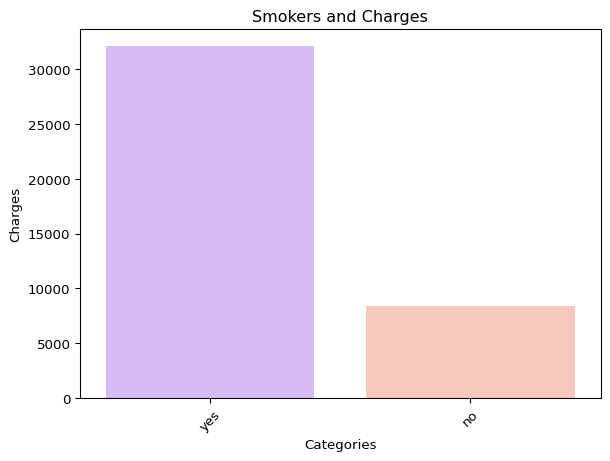

In [8]:
# Plot charges by smokers
sns.barplot(data = data, x = 'smoker', y = 'charges', palette = ["#D9B3FF", "#FFC4B3"], errorbar = None)
plt.title("Smokers and Charges")
plt.xlabel("Categories")
plt.ylabel("Charges")
plt.xticks(rotation = 45)
plt.show()

### Smokers and Region

In this plot it is shown that North-East and South-East regions have
more smokers than no smokers. However, it is intresting to notice how
South-East region has much more smokers than no smokers.

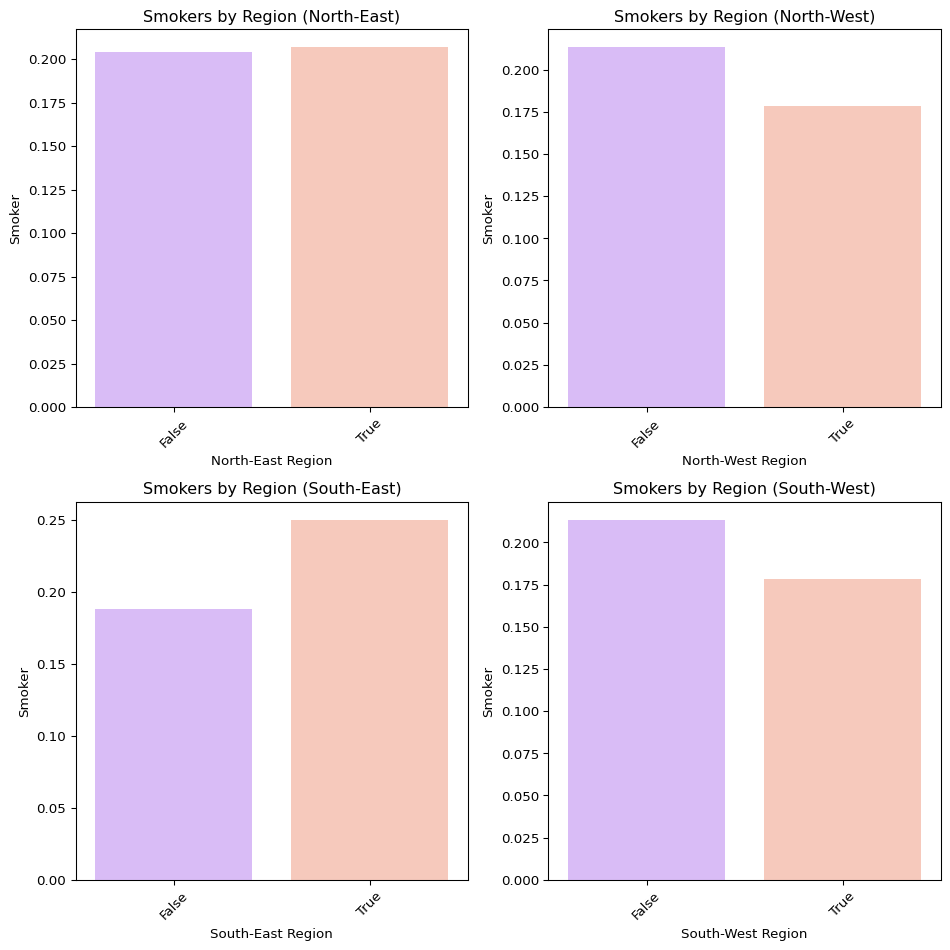

In [9]:
fig, axes = plt.subplots(2, 2, figsize = (10, 10))

#Plot smokers by North-East Region
sns.barplot(data = encoded_data, x = 'region_northeast', y = 'smoker_yes', palette = ["#D9B3FF", "#FFC4B3"], errorbar = None, ax = axes[0, 0])
axes[0, 0].set_title("Smokers by Region (North-East)")
axes[0, 0].set_xlabel("North-East Region")
axes[0, 0].set_ylabel("Smoker")
axes[0, 0].tick_params(axis = 'x', rotation = 45)

#Plot smokers by North-West Region
sns.barplot(data = encoded_data, x = 'region_northwest', y = 'smoker_yes', palette = ["#D9B3FF", "#FFC4B3"], errorbar = None, ax = axes[0, 1])
axes[0, 1].set_title("Smokers by Region (North-West)")
axes[0, 1].set_xlabel("North-West Region")
axes[0, 1].set_ylabel("Smoker")
axes[0, 1].tick_params(axis = 'x', rotation = 45)

#Plot smokers by South-East Region
sns.barplot(data = encoded_data, x = 'region_southeast', y = 'smoker_yes', palette = ["#D9B3FF", "#FFC4B3"], errorbar = None, ax = axes[1, 0])
axes[1, 0].set_title("Smokers by Region (South-East)")
axes[1, 0].set_xlabel("South-East Region")
axes[1, 0].set_ylabel("Smoker")
axes[1, 0].tick_params(axis = 'x', rotation = 45)

#Plot smokers by North-West Region
sns.barplot(data = encoded_data, x = 'region_southwest', y = 'smoker_yes', palette = ["#D9B3FF", "#FFC4B3"], errorbar = None, ax = axes[1, 1])
axes[1, 1].set_title("Smokers by Region (South-West)")
axes[1, 1].set_xlabel("South-West Region")
axes[1, 1].set_ylabel("Smoker")
axes[1, 1].tick_params(axis = 'x', rotation = 45)

plt.tight_layout()
plt.show()

### Smokers and Gender

In this plot it is shown that male smokers are slighly more than female
smokers.

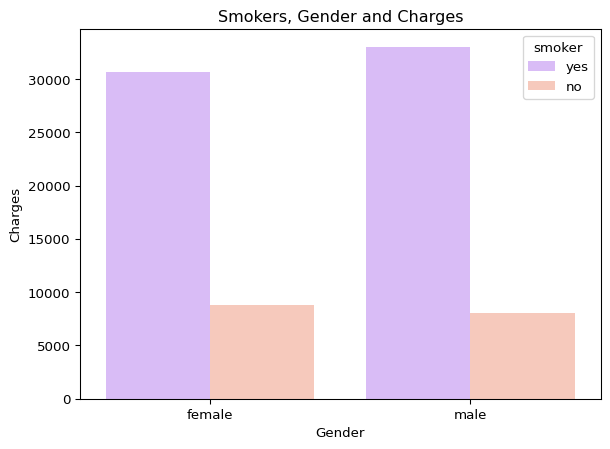

In [10]:
#Plot gender and charges based on weather they smoke or not
sns.barplot(data=data, x='sex', y='charges', hue='smoker', palette=["#D9B3FF", "#FFC4B3"], errorbar = None)
plt.title("Smokers, Gender and Charges")
plt.xlabel("Gender")
plt.ylabel("Charges")
plt.show()

### Region and Gender

In the following plot it is shown that South-East Region is the only
region that has slighly more male habitants.

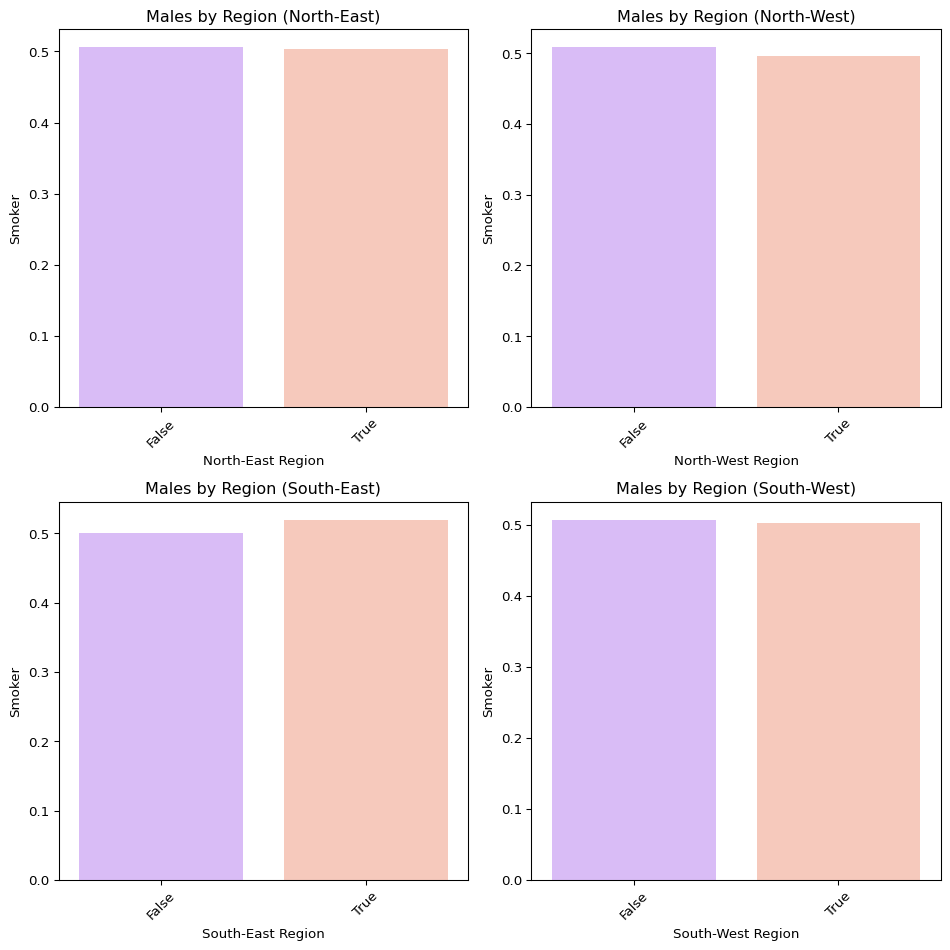

In [11]:
fig, axes = plt.subplots(2, 2, figsize = (10, 10))

#Plot gender by North-East Region
sns.barplot(data = encoded_data, x = 'region_northeast', y = 'sex_male', palette = ["#D9B3FF", "#FFC4B3"], errorbar = None, ax = axes[0, 0])
axes[0, 0].set_title("Males by Region (North-East)")
axes[0, 0].set_xlabel("North-East Region")
axes[0, 0].set_ylabel("Smoker")
axes[0, 0].tick_params(axis = 'x', rotation = 45)

#Plot gender by North-West Region
sns.barplot(data = encoded_data, x = 'region_northwest', y = 'sex_male', palette = ["#D9B3FF", "#FFC4B3"], errorbar = None, ax = axes[0, 1])
axes[0, 1].set_title("Males by Region (North-West)")
axes[0, 1].set_xlabel("North-West Region")
axes[0, 1].set_ylabel("Smoker")
axes[0, 1].tick_params(axis = 'x', rotation = 45)

#Plot gender by South-East Region
sns.barplot(data = encoded_data, x = 'region_southeast', y = 'sex_male', palette = ["#D9B3FF", "#FFC4B3"], errorbar = None, ax = axes[1, 0])
axes[1, 0].set_title("Males by Region (South-East)")
axes[1, 0].set_xlabel("South-East Region")
axes[1, 0].set_ylabel("Smoker")
axes[1, 0].tick_params(axis = 'x', rotation = 45)

#Plot gender by South-West Region
sns.barplot(data = encoded_data, x = 'region_southwest', y = 'sex_male', palette = ["#D9B3FF", "#FFC4B3"], errorbar = None, ax = axes[1, 1])
axes[1, 1].set_title("Males by Region (South-West)")
axes[1, 1].set_xlabel("South-West Region")
axes[1, 1].set_ylabel("Smoker")
axes[1, 1].tick_params(axis = 'x', rotation = 45)

plt.tight_layout()
plt.show()

### Region and Charges

As assumed, it is shown that South-East region has more charges.

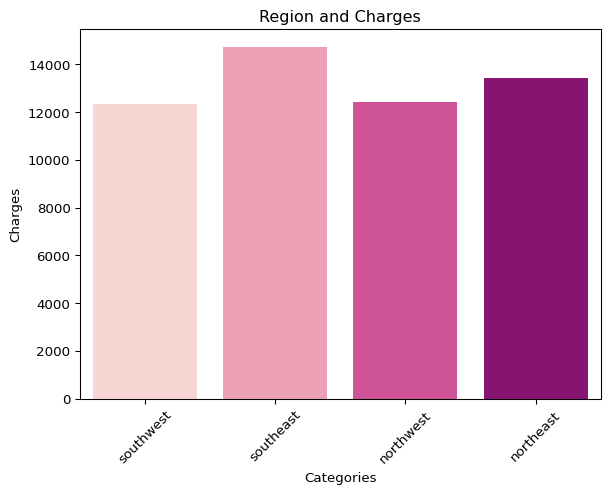

In [12]:
#Plot charges by region
sns.barplot(data = data, x = 'region', y = 'charges', palette = "RdPu", errorbar = None)
plt.title("Region and Charges")
plt.xlabel("Categories")
plt.ylabel("Charges")
plt.xticks(rotation = 45)
plt.show()

### Age and Charges

Reasonably, elders have more expenses.

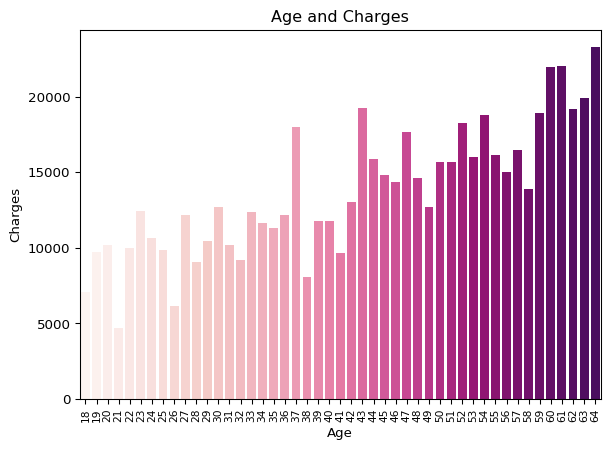

In [13]:
#Plot charges by age
sns.barplot(data = data, x = 'age', y = 'charges', palette = "RdPu", errorbar = None)
plt.title("Age and Charges")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.xticks(size = 8, rotation = 90)
plt.show()

For more coprehensive results, we group ages into three categories.
Those will be defined by k-means algorithm.

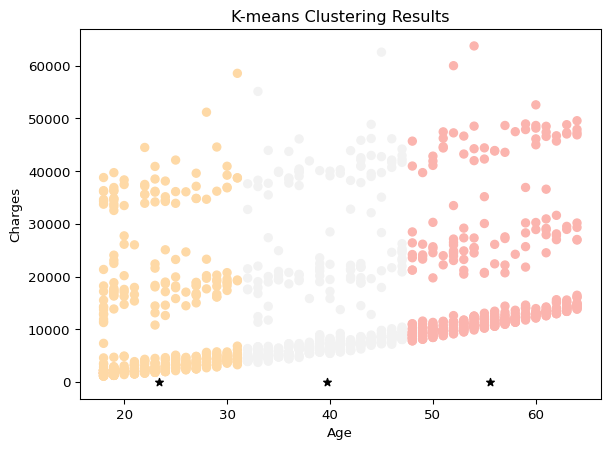

In [14]:
X = data['age'].values.reshape(-1, 1)  # Features
Y = data['charges'].values  # Target variable

# Create an instance of the K-means clustering algorithm
kmeans = KMeans(n_clusters = 3, random_state = 42)
# Fit the K-means algorithm to the data
kmeans.fit(X)
# Get the cluster labels for the data points
labels = kmeans.labels_
# Get the cluster centers
centers = kmeans.cluster_centers_

# Visualize the clustering results
plt.scatter(X, Y, c = labels, cmap = 'Pastel1')
plt.scatter(centers, np.zeros_like(centers), c = 'black', marker = '*')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('K-means Clustering Results')
plt.show()

As we notice from the K-Means Clustering Results, the three categories
can be split as:

-   Young Adults: 18-32 y.o.
-   Senior Adults: 32-48 y.o.
-   Elders: 48+ y.o.

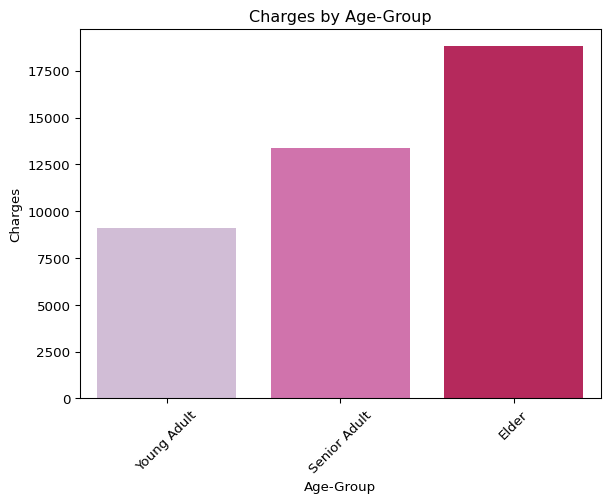

In [15]:
data['age_categories'] = np.nan
lst = [data]

for col in lst:
    col.loc[(col['age'] >= 18) & (col['age'] <= 25), 'age_categories'] = 'Young Adult'
    col.loc[(col['age'] > 25) & (col['age'] <= 55), 'age_categories'] = 'Senior Adult'
    col.loc[col['age'] > 55, 'age_categories'] = 'Elder'
    
# Plot the charges by age categories
sns.barplot(data = data, x = 'age_categories', y = 'charges', palette = "PuRd", errorbar = None)
plt.title("Charges by Age-Group")
plt.xlabel("Age-Group")
plt.ylabel("Charges")
plt.xticks(rotation = 45)
plt.show()

Both with K-means and EDA, it is proved that higher age means on average
higher charges.

### BMI and Charges

BMI is a mass indicator. It’s calculation leads to 4 main classes:

-   Under Weight: Body Mass Index (BMI) \< 18.5
-   Normal Weight: Body Mass Index (BMI) ≥ 18.5 and Body Mass Index
    (BMI) \< 24.9
-   Overweight: Body Mass Index (BMI) ≥ 25 and Body Mass Index (BMI) \<
    29.9
-   Obese: Body Mass Index (BMI) \> 30

To get better results and a better understanding, we add these
categories to our dataset.

In [16]:
# Code copied from: https://www.kaggle.com/code/janiobachmann/patient-charges-clustering-and-regression?scriptVersionId=9703986&cellId=20
# Create a new column for weight condition and initialize it with NaN values
data["weight_condition"] = np.nan
# Iterate over the dataset and assign weight condition based on BMI ranges
lst = [data]

for col in lst:
    # Assign "Underweight" to rows where BMI is less than 18.5
    col.loc[col["bmi"] < 18.5, "weight_condition"] = "Underweight"
    # Assign "Normal Weight" to rows where BMI is between 18.5 (inclusive) and 24.985 (exclusive)
    col.loc[(col["bmi"] >= 18.5) & (col["bmi"] < 24.986), "weight_condition"] = "Normal Weight"
    # Assign "Overweight" to rows where BMI is between 25 (inclusive) and 29.925 (exclusive)
    col.loc[(col["bmi"] >= 25) & (col["bmi"] < 29.926), "weight_condition"] = "Overweight"
    # Assign "Obese" to rows where BMI is 30 or greater
    col.loc[col["bmi"] >= 30, "weight_condition"] = "Obese"
    data.head()

Now that our dataset is ready, we plot the range on charges based on
BMI. It is shown that obese people have higher charges.

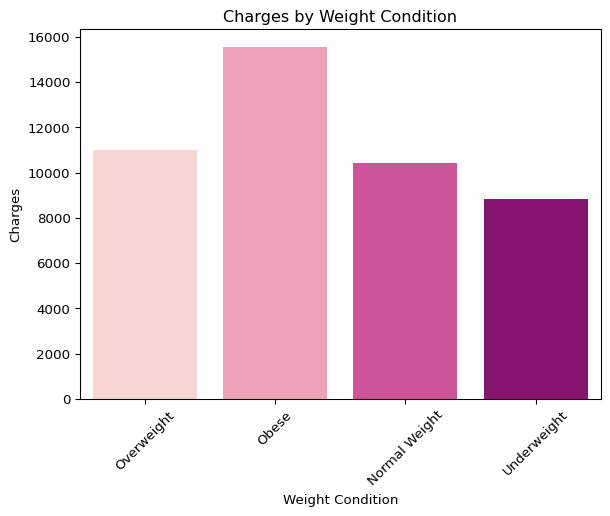

In [17]:
#Plot charges by weight condition
sns.barplot(data = data, x = "weight_condition", y = "charges", palette = "RdPu", errorbar = None)
plt.title("Charges by Weight Condition")
plt.xlabel("Weight Condition")
plt.ylabel("Charges")
plt.xticks(rotation = 45)
plt.show()

### BMI and Regions

In the following plot, it is shown that South-East Region has high
obesity count. This along with the previous plots supports the fact that
South-East Region has higher charges.

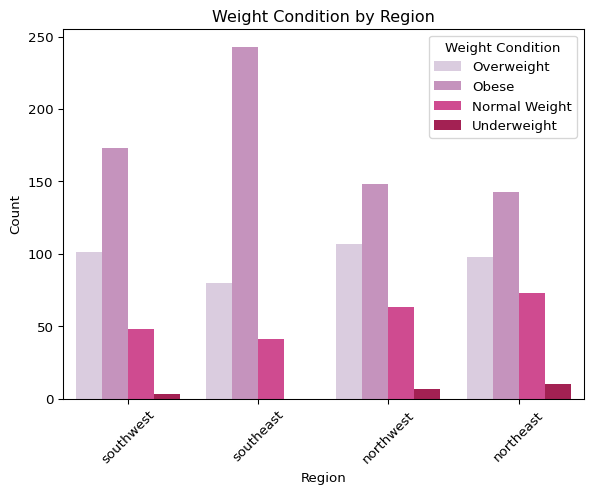

In [18]:
# Plot weight condition by region
sns.countplot(data = data, x = "region", hue = "weight_condition", palette = "PuRd")
plt.title("Weight Condition by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.xticks(rotation = 45)
plt.legend(title = "Weight Condition")
plt.show()

### BMI and Gender

In the following plot, it is shown that obesity is more common in males.

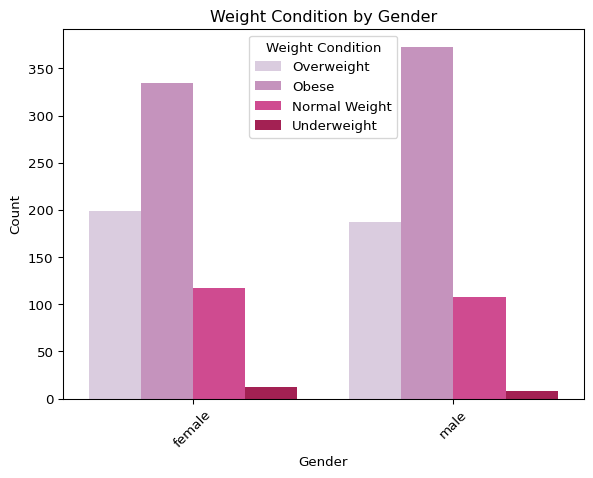

In [19]:
# Plot weight condition by gender
sns.countplot(data = data, x = "sex", hue = "weight_condition", palette = "PuRd")
plt.title("Weight Condition by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation = 45)
plt.legend(title = "Weight Condition")
plt.show()

### Gender and Charges

In this plot, it is noticable that males have higher charges than
females, as supported from the analysis above.

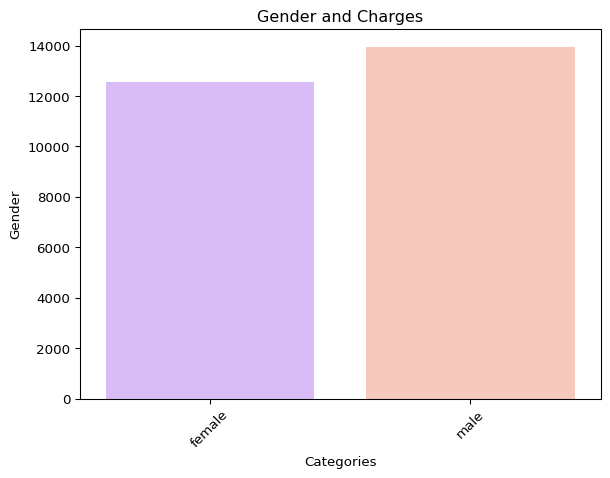

In [20]:
#Plot charges by gender
sns.barplot(data = data, x = 'sex', y = 'charges', palette = ["#D9B3FF", "#FFC4B3"], errorbar = None)
plt.title("Gender and Charges")
plt.xlabel("Categories")
plt.ylabel("Gender")
plt.xticks(rotation = 45)
plt.show()

### Parenthood and Charges

One more hypothesis we made is that parents have more expenses. This is
shown in the following plot.

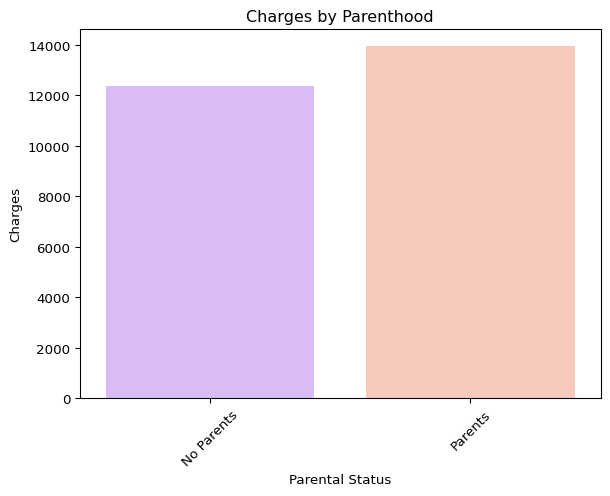

In [21]:
# Create a new column for parental status and initialize it with NaN values
data['parents'] = np.nan
lst = [data]

for col in lst:
    # Assign 'No Parents' to rows where children count is 0
    col.loc[col['children'] == 0, 'parents'] = 'No Parents'
    # Assign 'Parents' to rows where children count is 1 or more
    col.loc[col['children'] >= 1, 'parents'] = 'Parents'

# Plot the charges by parenthood
sns.barplot(data = data, x = 'parents', y = 'charges', palette = ["#D9B3FF", "#FFC4B3"], errorbar = None)
plt.title("Charges by Parenthood")
plt.xlabel("Parental Status")
plt.ylabel("Charges")
plt.xticks(rotation = 45)
plt.show()

## Clustering

To explore weather there are further underlying patterns in our data, we
perform clustering using the K-means algorithm.

### BMI - Charges Clustering

From the following plot we assume that:

-   *Cluster 0:* This category seems to have a lower BMI. We notice that
    this cluster has less charges, however, there seems to be a person
    who has higher charges than the rest of his cluster. This is probaby
    due to other factors like age, smoking or having children. What is
    more, there are some patients that seem to have a similar lifestyle.
-   *Cluster 1:* This category has medium to high BMI. In general it has
    high charges. This might be due to smoking since it is the factor
    that mainly affects the charges.
-   *Cluster 2:* This category has medium BMI. The group is “tight” so
    maybe this group has similar lifestyle too.
-   *Cluster 3:* This group has higher BMI but lower charges. This might
    be due to no smoking, being younger or not having children.

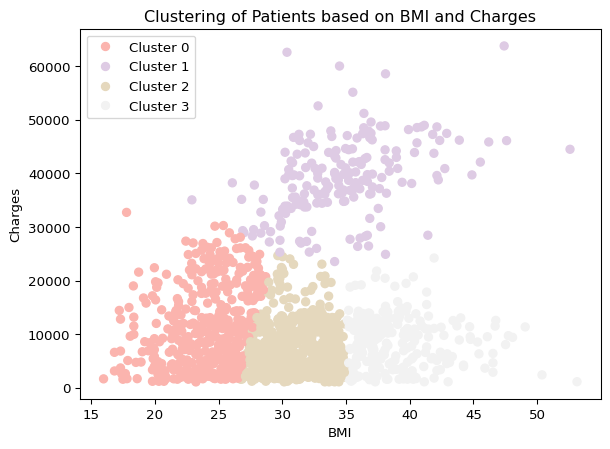

In [22]:
# Select the columns for clustering. Those are bmi and charges
cluster_data = data[['bmi', 'charges']]
# Scale the features
scaler = preprocessing.StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

# Perform K-means clustering
kmeans = KMeans(n_clusters = 4, random_state = 42)
clusters = kmeans.fit_predict(cluster_data_scaled)

# Add the cluster labels to the original data
data['cluster'] = clusters

# Visualize the clusters
plt.figure()
scatter = plt.scatter(data['bmi'], data['charges'], c = data['cluster'], cmap = 'Pastel1')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Clustering of Patients based on BMI and Charges')
plt.legend(handles = scatter.legend_elements()[0], labels = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.show()

### BMI - Smoking - Charges Clustering

As we assumed earlier, charges are affected by other factors too. Taking
into consideration the “smoking” factor, we can assume the following:

-   *Cluster0:* This must represent the non-smokers since the charges
    are on average lower.
-   *Cluster1:* This must represent the smokers since in general the
    charges are higher.

We also notice that the plot is similar to the “BMI - Charges
Clustering” plot but now we have two categories, the smokers and the
non - smokers. This verifies the assumptions we made earlier.

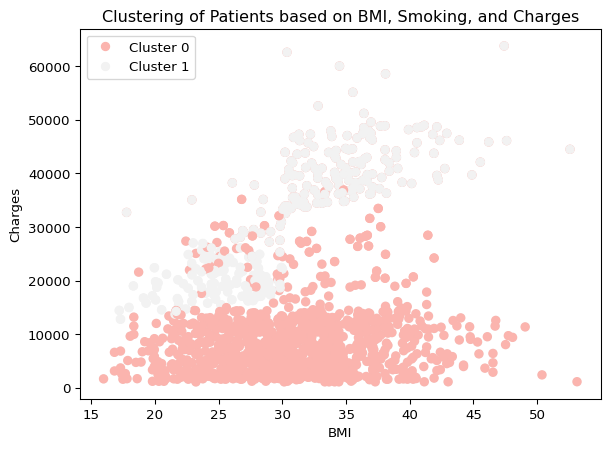

In [23]:
# Select the columns for clustering: bmi, charges, and smoker
cluster_data = data[['bmi', 'charges', 'smoker']]
# Encode the smoking category using a numeric label
cluster_data['smoker_encoded'] = cluster_data['smoker'].map({'no': 0, 'yes': 1})

# Scale the features
scaler = preprocessing.StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data[['bmi', 'charges']])

# Perform K-means clustering
kmeans = KMeans(n_clusters = 2, random_state = 42)
clusters = kmeans.fit_predict(cluster_data_scaled)

# Add the cluster labels to the original data
data['cluster'] = clusters

# Visualize the clusters
plt.figure()
scatter = plt.scatter(data['bmi'], data['charges'], c = data['cluster'], cmap = 'Pastel1')
plt.scatter(cluster_data['bmi'], cluster_data['charges'], c = cluster_data['smoker_encoded'], cmap='Pastel1')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Clustering of Patients based on BMI, Smoking, and Charges')
plt.legend(handles=scatter.legend_elements()[0], labels = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.show()

### BMI - Age - Charges Clustering

From the results above we assume that:

-   *Cluster 0:* This category might be older people with normal to
    medium BMI. Those with higher charges might also be smokers or have
    children.
-   *Cluster 1:* This category might be underweight people since those
    were very few.
-   *Cluster 2:* This category is mainly younger people. They probably
    share a low to normal BMI. Those who have higher charges migh be
    affected by other factors such as smoking.
-   *Cluster 3:* This category affects all ages and and has high
    charges. We assume it reflects people with high BMI that might be
    also smoking.

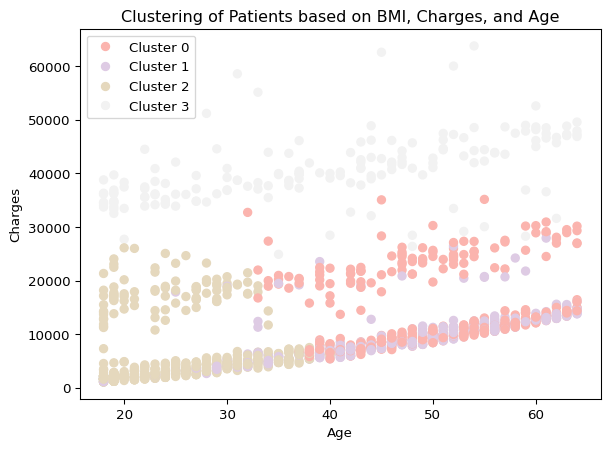

In [24]:
# Select the columns for clustering: BMI, charges, and age
cluster_data = data[['bmi', 'charges', 'age']]

# Scale the features
scaler = preprocessing.StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

# Perform K-means clustering
kmeans = KMeans(n_clusters = 4, random_state = 42)
clusters = kmeans.fit_predict(cluster_data_scaled)

# Add the cluster labels to the original data
data['cluster'] = clusters

# Visualize the clusters
plt.figure()
scatter = plt.scatter(data['age'], data['charges'], c = data['cluster'], cmap = 'Pastel1')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Clustering of Patients based on BMI, Charges, and Age')
plt.legend(handles = scatter.legend_elements()[0], labels = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.show()

### Charges - Age - Smoking Clustering

From the results we assume that:

-   *Cluster 0:* This category is about non smokers.
-   *Cluster 1:* This category is about smokers.

Smokers from the EDA we performed earlier seem to have higher charges.
However we notice in the plot above that some smokers and non smokers
have similar charges. This is due other factors like BMI and parenthood.

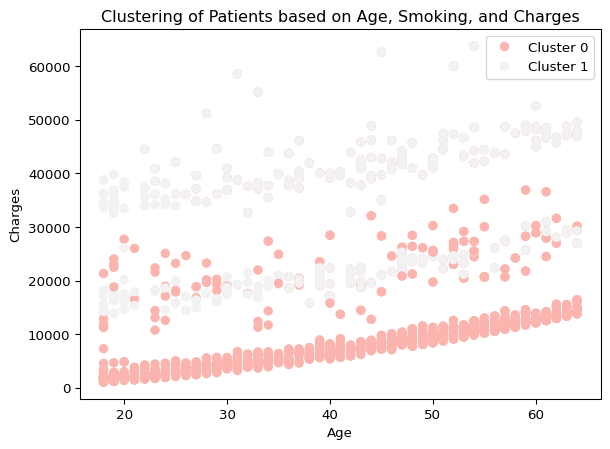

In [25]:
# Select the columns for clustering: age, charges, and smoking
cluster_data = data[['age', 'charges', 'smoker']]
# Encode the smoking category using a numeric label
cluster_data['smoker_encoded'] = cluster_data['smoker'].map({'no': 0, 'yes': 1})

# Scale the features
scaler = preprocessing.StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data[['age', 'charges']])

# Perform K-means clustering
kmeans = KMeans(n_clusters = 2, random_state = 42)
clusters = kmeans.fit_predict(cluster_data_scaled)

# Add the cluster labels to the original data
data['cluster'] = clusters

# Visualize the clusters
plt.figure()
scatter = plt.scatter(data['age'], data['charges'], c = data['cluster'], cmap = 'Pastel1')
plt.scatter(cluster_data['age'], cluster_data['charges'], c = cluster_data['smoker_encoded'], cmap='Pastel1')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Clustering of Patients based on Age, Smoking, and Charges')
plt.legend(handles=scatter.legend_elements()[0], labels = ['Cluster 0', 'Cluster 1'])
plt.show()

### Parenthood Clustering

The plots above prove that parenthood is not a significant factor.
Hence, there iis no point into exploring parenthood and smoking.

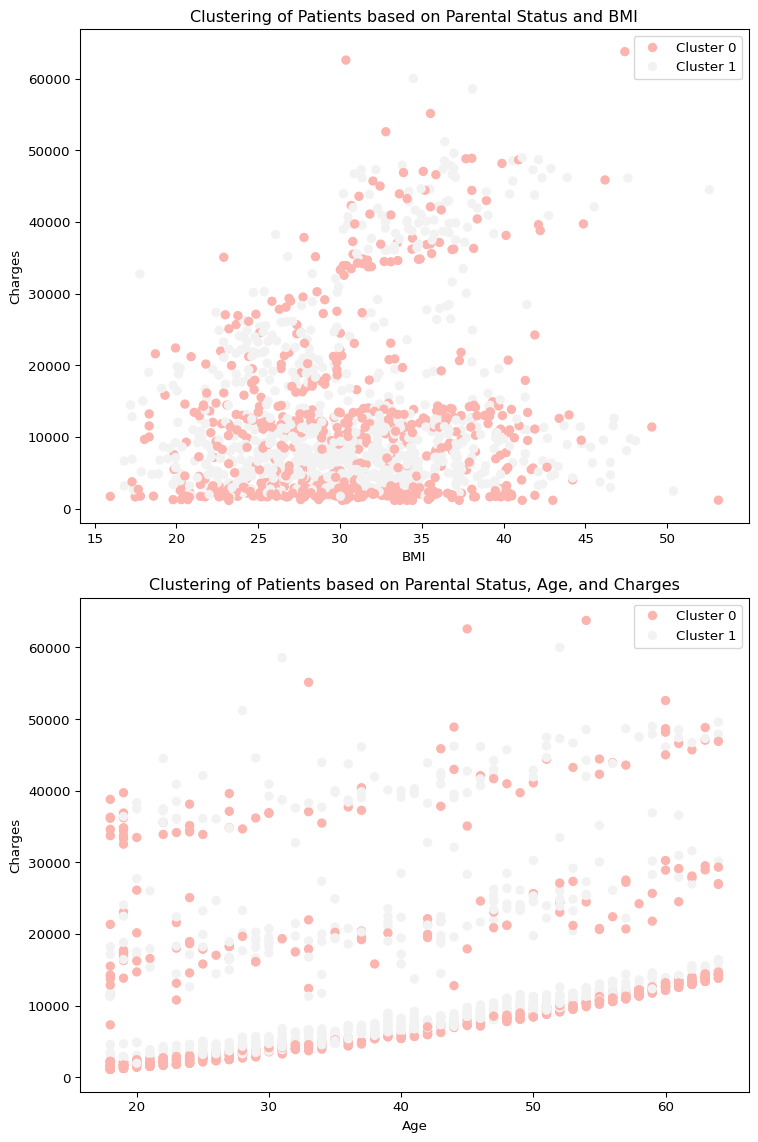

In [26]:
fig, axes = plt.subplots(2, 1, figsize=(8, 12))

# Encode the "parents" column
le = LabelEncoder()
data['parents_encoded'] = le.fit_transform(data['parents'])

# Clustering based on Parental Status and BMI
cluster_data_bmi = data[['parents_encoded', 'charges', 'bmi']]
cluster_data_bmi_scaled = scaler.fit_transform(cluster_data_bmi)
clusters_bmi = kmeans.fit_predict(cluster_data_bmi_scaled)

data['cluster_bmi'] = clusters_bmi
scatter_bmi = axes[0].scatter(data['bmi'], data['charges'], c=data['cluster_bmi'], cmap='Pastel1')
axes[0].set_xlabel('BMI')
axes[0].set_ylabel('Charges')
axes[0].set_title('Clustering of Patients based on Parental Status and BMI')
axes[0].legend(handles=scatter_bmi.legend_elements()[0], labels=['Cluster 0', 'Cluster 1'])

# Clustering based on Parental Status, Age, and Charges
cluster_data_age = data[['parents_encoded', 'charges', 'age']]
cluster_data_age_scaled = scaler.fit_transform(cluster_data_age)
clusters_age = kmeans.fit_predict(cluster_data_age_scaled)

data['cluster_age'] = clusters_age
scatter_age = axes[1].scatter(data['age'], data['charges'], c=data['cluster_age'], cmap='Pastel1')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Charges')
axes[1].set_title('Clustering of Patients based on Parental Status, Age, and Charges')
axes[1].legend(handles=scatter_age.legend_elements()[0], labels=['Cluster 0', 'Cluster 1'])

plt.tight_layout()
plt.show()

## Conclusion

Overall, our initial hypotheses were true. Even though one might assume
that being a parent is an important factor, in this dataset it seemed to
be the less significant factor. EDA suggested that being a parent is on
average significant, but K-Means regected this statement.

## Bibliography

1.  https://www.kaggle.com/code/janiobachmann/patient-charges-clustering-and-regression/data
2.  Lab 4: EM Clustering, Sotiris Tasoulis, Panagiotis Anagnostou